In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import auc,roc_curve



0.9666666666666667
1.0
0.3103448275862069
0.4736842105263158


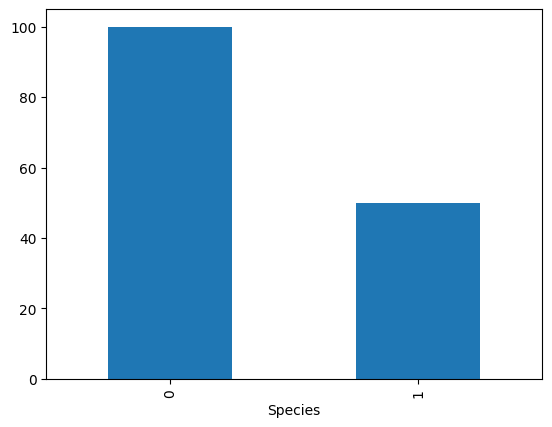

In [19]:
data=pd.read_csv('Iris.csv')
data['Species']=data['Species'].apply(lambda x:1 if x=='Iris-setosa'else 0)
# data['Species'].value_counts().plot(kind='bar')
df=data.values
x=df[:,0:4]
y=df[:,-1].reshape(x.shape[0],1)
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=True,test_size=0.2,random_state=1234)
x_train=x_train.T
x_test=x_test.T
y_test=y_test.T
y_train=y_train.T
it=1000
lr=0.001
def sigma(x):
    return (1/(1+np.exp(-x)))
def model(x,y,it,lr):
    n=x.shape[0]
    m=x.shape[1]
    w=np.zeros((n,1))
    b=0
    for i in range(it):
        z=np.dot(w.T,x)+b
        a=sigma(z)
        dw=(1/m)*np.dot(a-y,x.T)
        db=(1/m)*np.sum(a-y)
        w-=lr*dw.T
        b-=lr*db
    return w,b
w,b=model(x_train,y_train,it,lr)
def metrics(x,y,w,b):
    z=np.dot(w.T,x)+b
    a=sigma(z)
    a=a>0.4
    a=np.array(a,dtype='int64')
    tp=np.sum((a==1) & (y==1))
    fn=np.sum((a==0) & (y==0))
    fp=np.sum((a==0) & (y==1))
    tn=np.sum((a==1) & (y==0))
    acc=(tp+fn)/(tp+fn+tn+fp)
    prec=tp/(tp+fp)
    rec=tp/(tp+fn)
    f1=2*prec*rec/(prec+rec)
    print(acc)
    print(prec)
    print(rec)
    print(f1)
metrics(x_test,y_test,w,b)



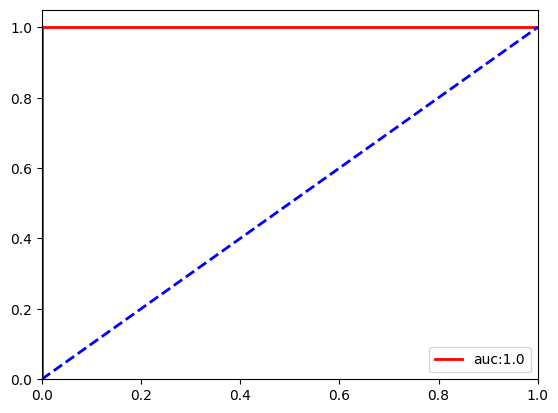

In [18]:
z=np.dot(w.T,x_test)+b
a=sigma(z)
fpr,tpr,threshold=roc_curve(y_test.T,a.T)
aucc=auc(fpr,tpr)
plt.plot(fpr,tpr,color='red',lw=2,label=f'auc:{aucc}')
plt.plot([0,1],[0,1],color='blue',lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.legend(loc='lower right')
plt.show()